# Explore Video Games Sales

#### By Xiang Zhang

## Table of Contents 

### Part 1: Import modules, load the data and data cleaning.
### Part 2: Explore Data with insights
    1.Which platform has the most games selection?
    2.Which product family generate most sales?
    3.Most popular video games Genre
    4.How Does Sales look like around the world?
    5.Which Game is most popular?
    6.How sales overall have done since 1980?
    7.For consoles like Wii, Playstation and Xbox, what were the global sales over the past 10+ years?
    8.For the 10 highest selling games by global sales, how did sales look in each of those 4 specified regions ？

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from collections import Counter
from wordcloud import WordCloud
import matplotlib.ticker as tick
%pylab inline
warnings.filterwarnings("ignore");

Populating the interactive namespace from numpy and matplotlib


### Background information

A video game is an electronic game that can be played on a computing device, such as a personal computer, gaming console or mobile phone. Depending on the platform, video games can be subcategorized into computer games and console games. In recent years however, the emergence of social networks, smartphones and tablets introduced new categories such as mobile and social games. Video games have come a long way since the first games emerged in the 1970s. The data we are going to look into today is about video game sales in worldwide.


### Dataset Discription

This dataset contains a list of video games with sales greater than 100,000 copies.

The data can be found here:https://www.kaggle.com/gregorut/videogamesales

#### Here are the fields information:
<table>
  <thead>
    <tr>
      <th>Field Name</th>
      <th>Definition</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Name</td>
      <td> The games name</td>
    </tr>
    <tr>
      <td>Platform</td>
      <td>Platform of the games release (i.e. PC,PS4, etc.)</td>
    </tr>
    <tr>
      <td>Year</td>
      <td>Year of the game's release</td>
    </tr>
    <tr>
      <td>Genre</td>
      <td>Genre of the game</td>
    </tr>
    <tr>
      <td>Publisher</td>
      <td>Publisher of the game</td>
    </tr>
    <tr>
      <td>NA_Sales</td>
      <td>Sales in North America (in millions)</td>
    </tr>
    <tr>
      <td>EU_Sales</td>
      <td>Sales in Europe (in millions)</td>
    </tr>
    <tr>
      <td>JP_Sales</td>
      <td>Sales in Japan (in millions)</td>
    </tr>
    <tr>
      <td>Other_Sales</td>
      <td>Sales in the rest of the world (in millions)</td>
    </tr>
    <tr>
      <td>Global_Sales</td>
      <td>Total worldwide sales (in millions)</td>
    </tr>
  </tbody>
</table>

### Part 1: Import modules, load the data and data cleaning

### Import Data

In [2]:
df = pd.read_csv('/Users/xiangzhang/Desktop/Summer 2018/Data Viz/P2/vgsales.csv')

### Data Cleaning & Feature Engineering
**Steps explained:**

- Check NA, and remove NA from the list
- Change the "Year" Column to interger
- Replace platform name
- I created a Product Family list for future analysis


In [3]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [4]:
df = df.dropna()
df['Year'] = df['Year'].astype(int)
df["Platform" ] = df["Platform"].replace(
    ["GB", "NES", "DS", "X360", "SNES", "GBA", "3DS", "N64", "PS", "XB",
     "XOne", "PSV", "TG16", "3DO", "PCFX"],
    ["Game Boy", "Nintendo Entertainment System", "Nintendo DS", "Xbox 360",
     "Super Nintendo Entertainment System",
     "Nintendo Game Boy Advance", "Nintendo 3DS", "Nintendo 64","PlayStation",
     "Xbox","Xbox One", "PlayStation Vita", "TurboGrafx-16",
     "3DO Interactive Multiplayer", "NEC PC‑FX"])
df.loc[df['Name'] == "FIFA Soccer 13", "Genre"] = "Sports" ## recategorized "FIFA Soccer 13" Genre from Action to Sports since it's a soccer game

In [5]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,Nintendo Entertainment System,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,Game Boy,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#### Define Product Family

In [6]:
df.Platform.unique()

array(['Wii', 'Nintendo Entertainment System', 'Game Boy', 'Nintendo DS',
       'Xbox 360', 'PS3', 'PS2', 'Super Nintendo Entertainment System',
       'Nintendo Game Boy Advance', 'Nintendo 3DS', 'PS4', 'Nintendo 64',
       'PlayStation', 'Xbox', 'PC', '2600', 'PSP', 'Xbox One', 'GC',
       'WiiU', 'GEN', 'DC', 'PlayStation Vita', 'SAT', 'SCD', 'WS', 'NG',
       'TurboGrafx-16', '3DO Interactive Multiplayer', 'GG',
       'NEC PC\xe2\x80\x91FX'], dtype=object)

In [7]:
PlayStation = ['PS3', 'PS4', 'PS2', 'PlayStation', 'PSP', 'PlayStation Vita']
Nintendo = ['Wii', 'Nintendo Entertainment System', 'Game Boy','Nintendo DS', 
            'Super Nintendo Entertainment System', 'Nintendo Game Boy Advance',
            'Nintendo 3DS', 'Nintendo 64','WiiU']
Microsoft = ['Xbox', 'Xbox One', 'Xbox 360']
Other = ['PC', '2600', 'GC', 'GEN', 'DC', 'SAT', 'SCD', 'WS', 'NG', 'TurboGrafx-16', 
         '3DO Interactive Multiplayer', 'GG', 'NEC PC‑FX']

In [8]:
def ProductFamily (c):
  if c['Platform'] in PlayStation:
    return 'PlayStation'
  elif c['Platform'] in Nintendo:
    return 'Nintendo'
  elif c['Platform'] in Microsoft:
    return 'Microsoft'
  elif c['Platform'] in Other:
    return 'Other'
  else:
    return 'o'

df['ProductFamily'] = df.apply(ProductFamily, axis=1)

In [9]:
def x_fmt(tick_val, pos): # define a function to make axis values show with $ sign and follow by M(million) or B(Billion)
    if tick_val >= 1000:
        val = tick_val/1000
        return '${0:.1f}B'.format(val)
    elif tick_val > 1:
        val = int(tick_val)
        return '${:d}M'.format(val)
    else:
        return tick_val
    
def y_fmt(tick_val, pos): 
    if tick_val >= 1000:
        val = tick_val/1000
        return '${0:.1f}B'.format(val)
    elif tick_val > 1:
        val = int(tick_val)
        return '${:d}M'.format(val)
    else:
        return tick_val

## Visualizations

### Part 2: Explore Data with insights

###  Question 1: Which platform has the most games selection?

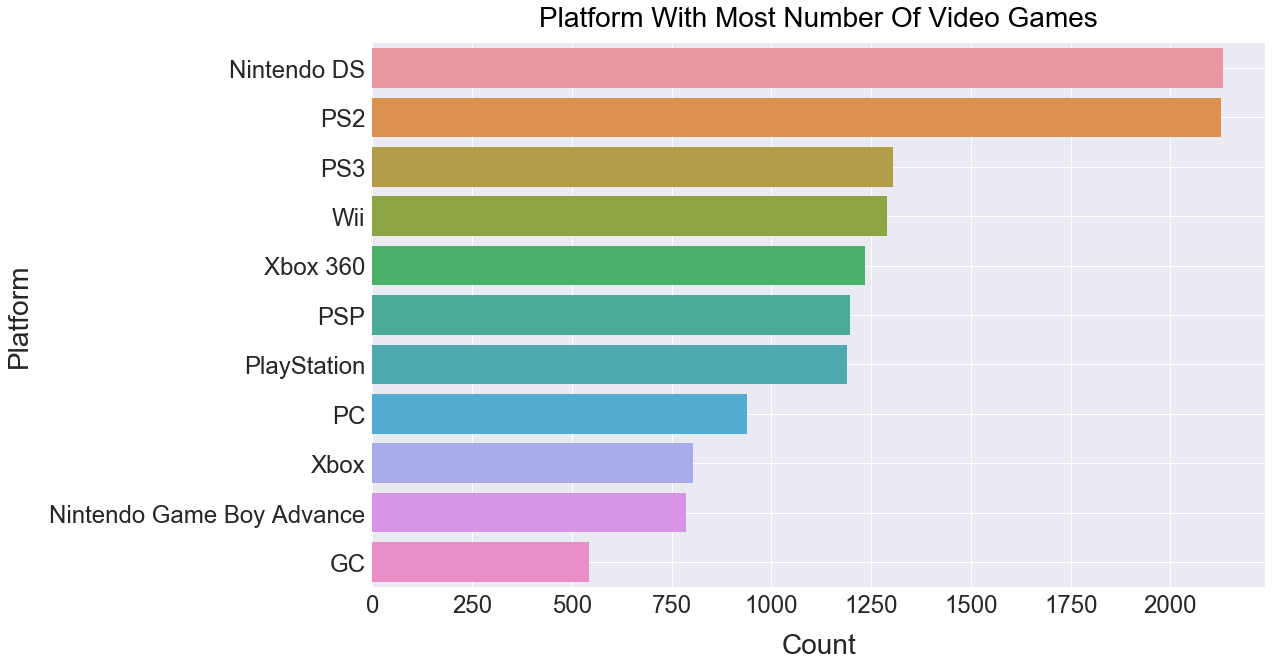

In [10]:
sns.set_style("darkgrid")
num_games=df.groupby('Platform').size().sort_values(ascending=False).reset_index()[:11]
num_games.columns=['Platform', 'Count']
plt.figure(figsize=(16,10))
sns.barplot(y=num_games["Platform"], x=num_games["Count"], linewidth=1)
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.ylabel("Platform", labelpad=16, fontsize=28)
plt.xlabel("Count", labelpad=16, fontsize=28)
plt.grid(True)
plt.title("Platform With Most Number Of Video Games", color='Black', fontsize=28, y=1.02)
plt.show();

#### Insights:
1. Nintendo DS has the most number of video games selection in its platform, followed by PS2.
2. PS3, Wii , and Xbox 360 has only about 50% of the games selection compared to Nintendo DS and PS2. 

### Question 2: Which product family generate most sales?

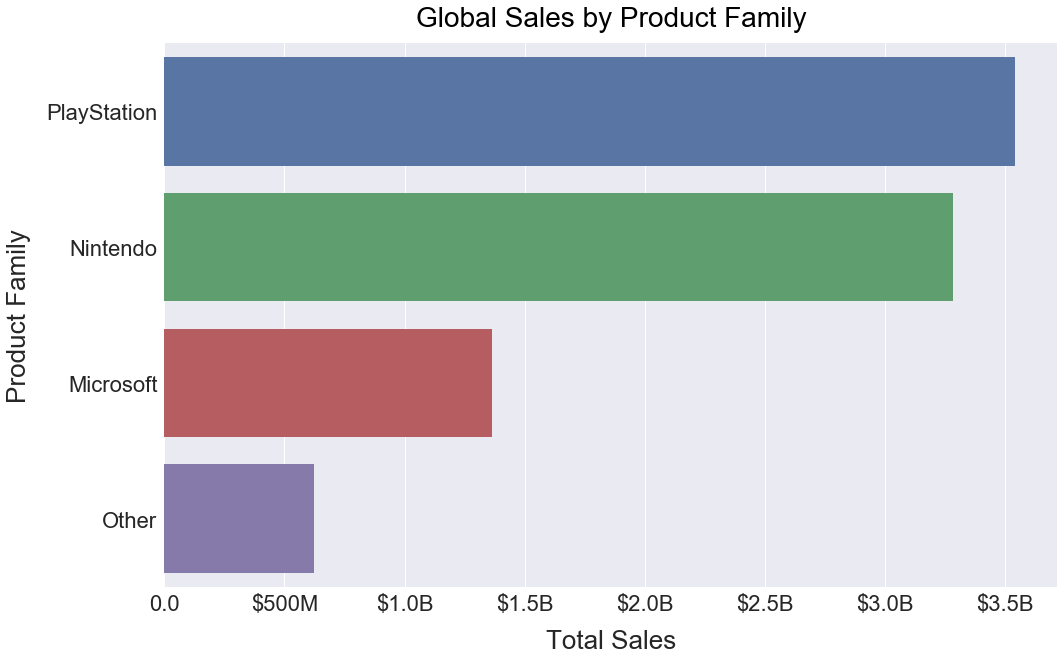

In [11]:
sns.set_style("darkgrid")
Pfamily_sale = df.groupby('ProductFamily')['Global_Sales'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(16,10))
sns.barplot(y=Pfamily_sale["ProductFamily"], x=Pfamily_sale["Global_Sales"], linewidth=1)
plt.yticks(fontsize=22)
plt.xticks(fontsize=22)
plt.ylabel("Product Family", labelpad=15, fontsize=26)
plt.xlabel("Total Sales", labelpad=15, fontsize=26)
plt.title("Global Sales by Product Family", color='Black', fontsize=28, y=1.02)
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(x_fmt))
plt.show();

#### Insights:
1.PlayStation is the greatest video game system of all time. It has the most global sales with over 3.5 billions dollars, Nintendo come in as second place. They are the two giants in the video games industry.

### Question 3: Most popular video games Genre

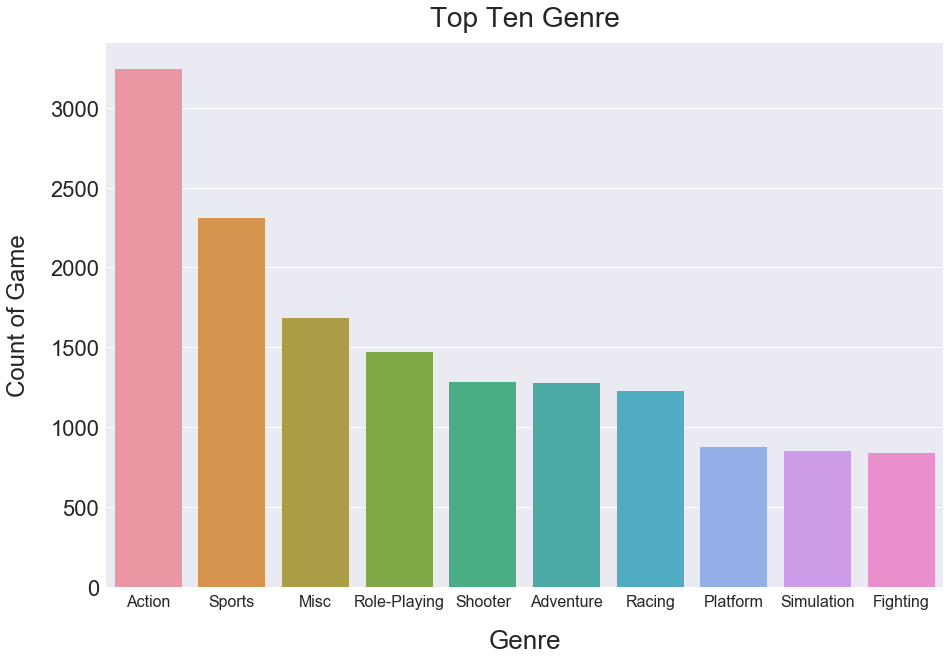

In [12]:
genre = Counter(df['Genre'].dropna().tolist()).most_common(10)
genre_name = [name[0] for name in genre]
genre_counts = [name[1] for name in genre]

fig,ax = plt.subplots(figsize=(15,10))
sns.barplot(x=genre_name, y=genre_counts, ax=ax)
plt.title('Top Ten Genre', fontsize=28, y=1.02)
plt.yticks(fontsize=22)
plt.xticks(fontsize=22)
plt.xlabel('Genre',labelpad=20, fontsize=26)
plt.ylabel('Count of Game', labelpad=20, fontsize=24)
ticks = plt.setp(ax.get_xticklabels(), fontsize=16, rotation=360)
plt.show();

#### Insights:
1. Action games were one of the most popular genres. 
2. Action genre has over 3000 games across multiple platforms.

### Question 4: How Does Sales look like around the world?

In [13]:
GenreGroup = df.groupby(['Genre']).sum().loc[:, 'NA_Sales': 'Global_Sales'].round().astype(int)
GenreGroup['NA_Sales%'] = GenreGroup['NA_Sales']/GenreGroup['Global_Sales']
GenreGroup['EU_Sales%'] = GenreGroup['EU_Sales']/GenreGroup['Global_Sales']
GenreGroup['JP_Sales%'] = GenreGroup['JP_Sales']/GenreGroup['Global_Sales']
GenreGroup['Other_Sales%'] = GenreGroup['Other_Sales']/GenreGroup['Global_Sales']

In [14]:
GenreGroupSales=GenreGroup.loc[:, 'NA_Sales': 'Other_Sales'].reset_index()
GenreGroupSales

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,859,506,158,182
1,Adventure,102,64,52,17
2,Fighting,221,100,87,36
3,Misc,397,212,107,74
4,Platform,446,201,131,52
5,Puzzle,122,51,57,12
6,Racing,357,236,57,77
7,Role-Playing,326,188,350,59
8,Shooter,575,310,38,102
9,Simulation,182,113,64,31


In [15]:
Genre=['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing',
       'Shooter', 'Simulation', 'Sports', 'Strategy']
RegionSales=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
GenreGroup=GenreGroup.rename(index=str, columns={"NA_Sales": "North America", "EU_Sales": "Europe","JP_Sales":"Japan","Other_Sales":"Other"})

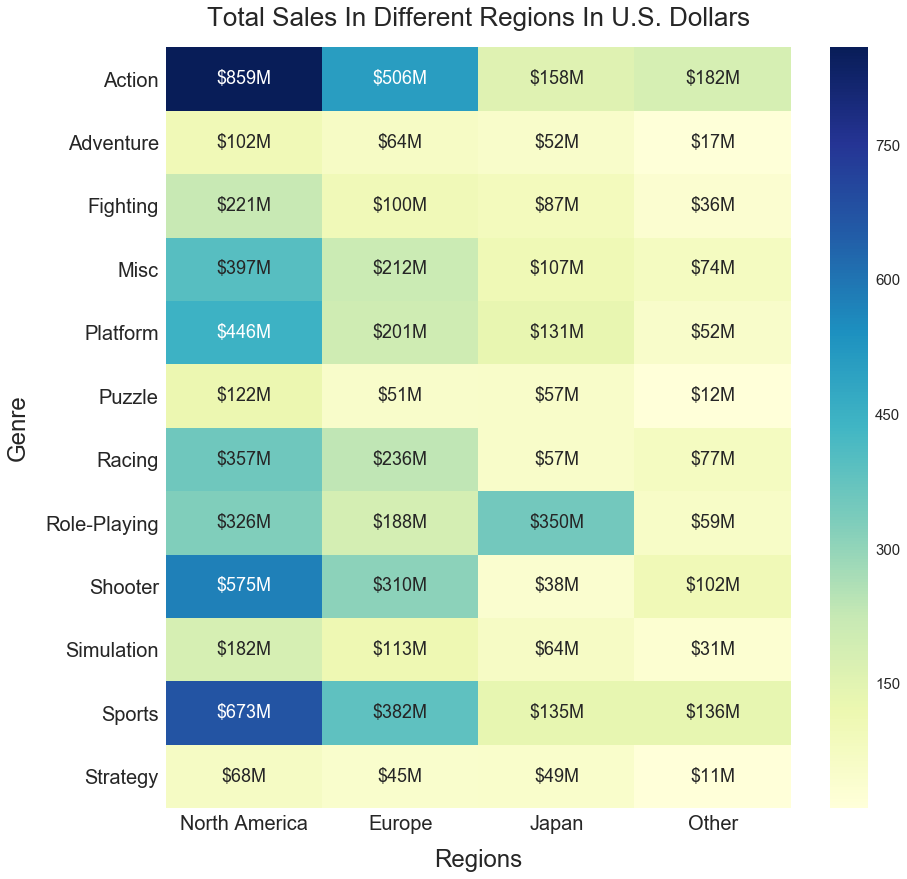

In [16]:
sns.set_context("poster")
plt.figure(figsize=(14, 14))
sns.set(font_scale=1.5)
ax=sns.heatmap(GenreGroup.loc[:, 'North America': 'Other'], annot=True, fmt = '.0f',cmap="YlGnBu")
for t in ax.texts: t.set_text("$"+t.get_text() + "M")
plt.title("Total Sales In Different Regions In U.S. Dollars", y=1.02, fontsize=26)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel("Regions", labelpad=15, fontsize=24)
plt.ylabel("Genre", labelpad=15, fontsize=24)
plt.show();

#### Insights:
1.Action, Sports and Shooter Genre In North America contribute the most sales.

In [17]:
GenreGroup=GenreGroup.rename(index=str, columns={"NA_Sales%": "North America Sales%",
                                                 "EU_Sales%": "Europe Sales%",
                                                 "JP_Sales%": "Japan Sales%", 
                                                 "Other_Sales%": "Other Sales%"})

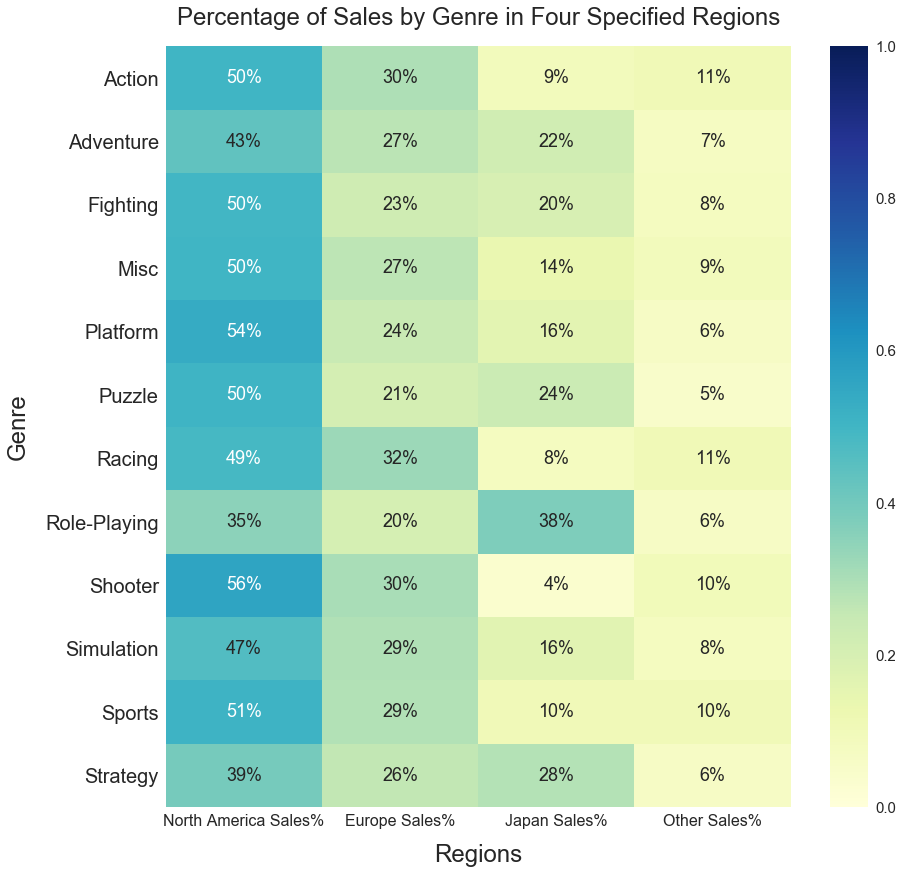

In [18]:
sns.set_context("poster")
plt.figure(figsize=(14, 14))
sns.set(font_scale=1.5)
sns.heatmap(GenreGroup.loc[:,'North America Sales%': 'Other Sales%'], vmax=1, vmin=0, annot=True, 
            fmt = '.0%',cmap="YlGnBu")
plt.title("Percentage of Sales by Genre in Four Specified Regions", y=1.02, fontsize=24)
plt.yticks(fontsize = 20 )
plt.xticks(fontsize = 16 )
plt.xlabel("Regions", labelpad=15, fontsize=24)
plt.ylabel("Genre", labelpad=15, fontsize=24)
plt.show();

#### Insights:
1.Almost every Genres sale in North America contributes around 50% of it global sales.

### Question 5: Which Game is most popular?

In [19]:
Sports=df[df.Genre == 'Sports']
Actions=df[df.Genre == "Action"]

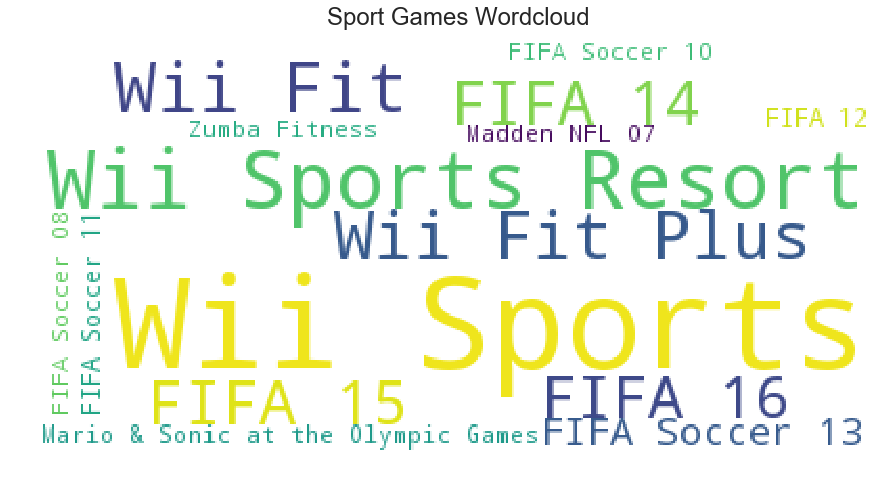

In [20]:
plt.figure(figsize=(15,15))
Sportsale=Sports.groupby('Name')['Global_Sales'].sum().sort_values(ascending = False).to_dict()
wc=WordCloud(
    background_color='white',
    max_words=15,
    max_font_size=60 
     ).generate_from_frequencies(Sportsale)
plt.imshow(wc)
plt.title("Sport Games Wordcloud", fontsize=24, y=1.02)
plt.axis("off")
plt.show();

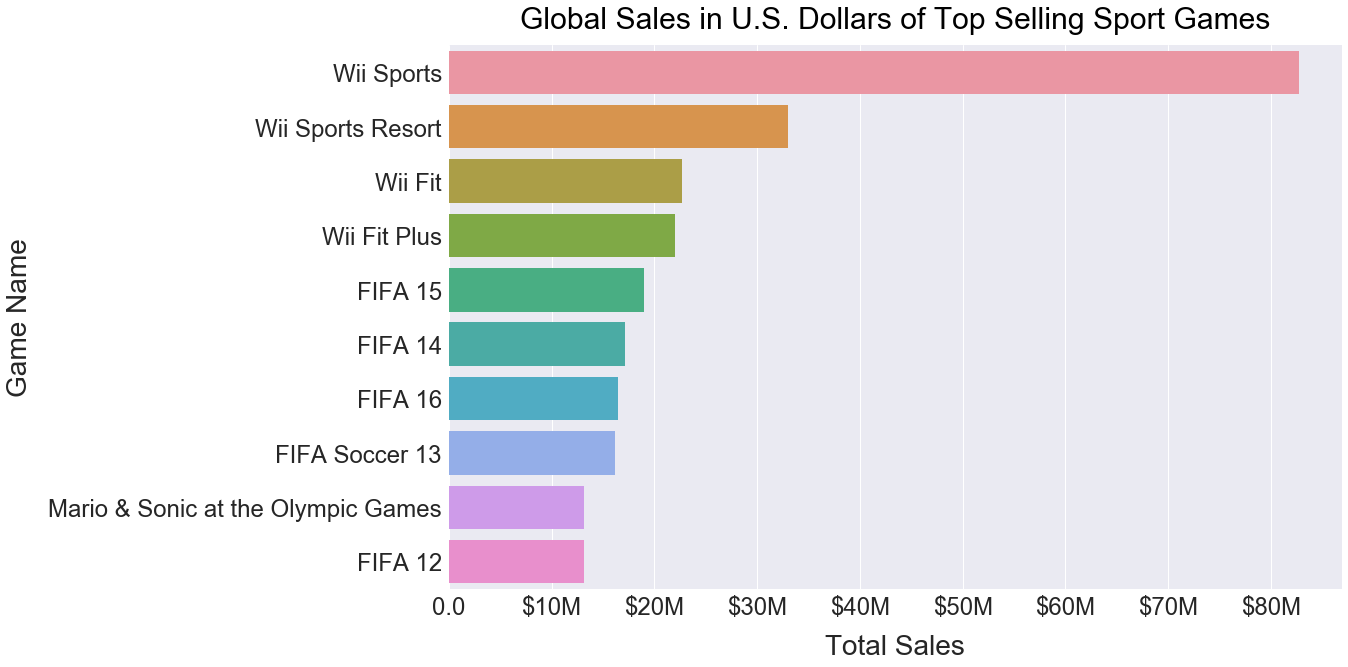

In [21]:
topsales=Sports.groupby(['Name'])['Global_Sales'].sum().sort_values(ascending = False).reset_index().head(10)
plt.figure(figsize = (16,10))
sns.barplot(y=topsales["Name"], x=topsales["Global_Sales"], linewidth=1)
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.ylabel("Game Name", labelpad=15, fontsize=28)
plt.xlabel("Total Sales", labelpad=15, fontsize=28)
plt.title("Global Sales in U.S. Dollars of Top Selling Sport Games", color='Black', fontsize=30, y=1.02)
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(x_fmt))
plt.show();

#### Insights:
1.Wii Sports,Wii Sports Resort, Wii Fit ,and Wii Fit Plus are amount the top global sales in the sport genre. And all these four games are part of Nintindo Family.

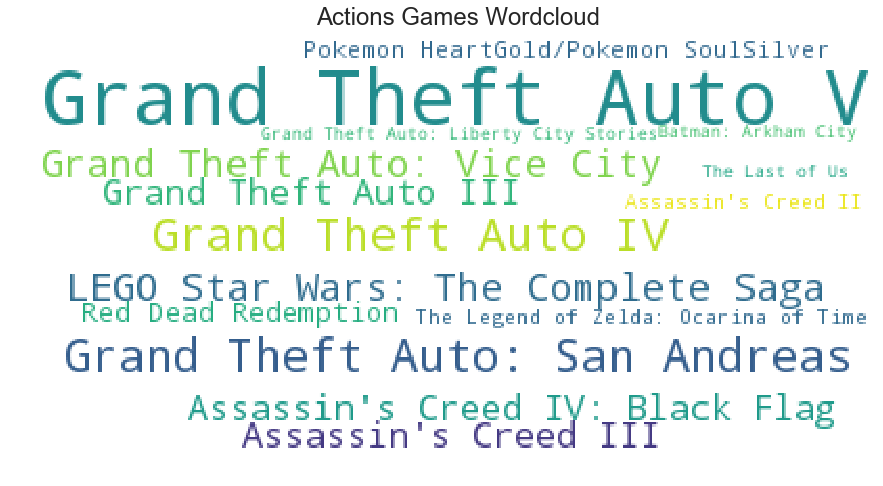

In [22]:
plt.figure(figsize=(15,15))
Actionsale=Actions.groupby('Name')['Global_Sales'].sum().sort_values(ascending = False).to_dict()
wc=WordCloud(
    background_color='white',
    max_words=15,
    max_font_size=60 
    ).generate_from_frequencies(Actionsale)
plt.imshow(wc)
plt.title("Actions Games Wordcloud", fontsize=24, y=1.02)
plt.axis("off")
plt.show();

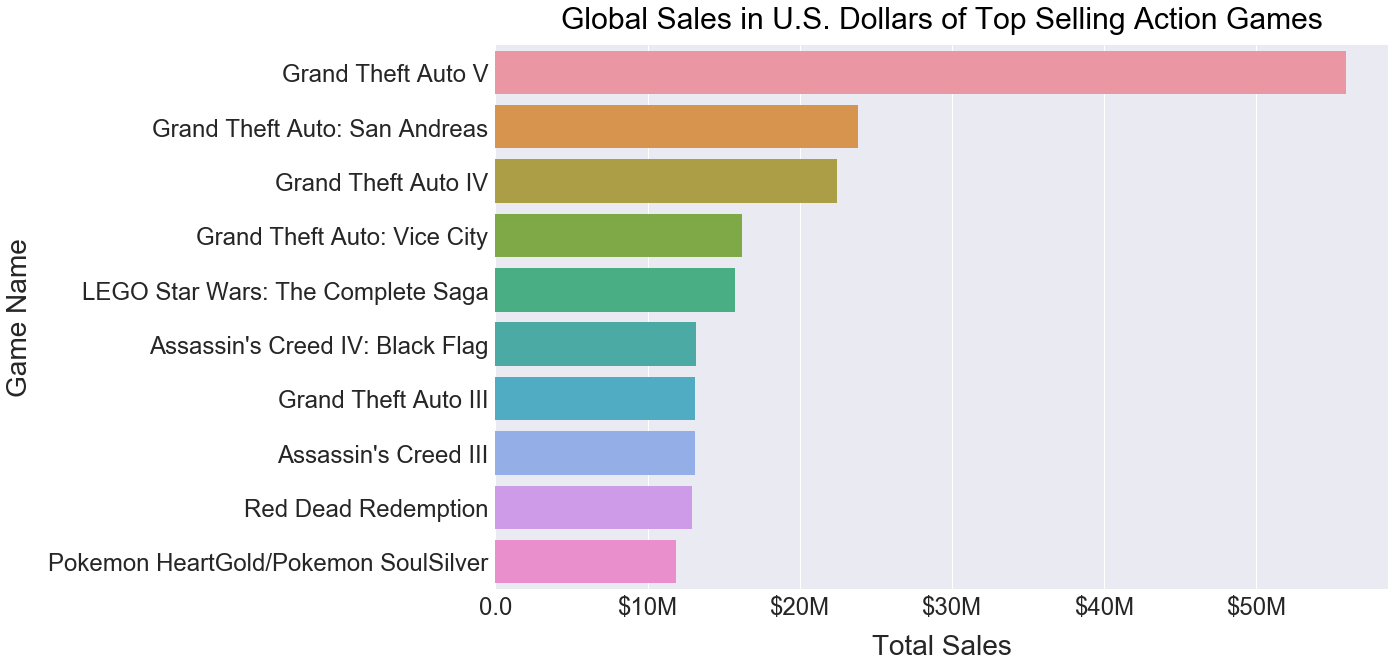

In [23]:
topsales=Actions.groupby(['Name'])['Global_Sales'].sum().sort_values(ascending = False).reset_index().head(10)
plt.figure(figsize = (16,10))
sns.barplot(y=topsales["Name"], x=topsales["Global_Sales"], linewidth=1)
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.ylabel("Game Name", labelpad=15, fontsize=28)
plt.xlabel("Total Sales", labelpad=15, fontsize=28)
plt.title("Global Sales in U.S. Dollars of Top Selling Action Games", color='Black', fontsize=30, y=1.02)
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(x_fmt))
plt.show();

#### Insights:
1.Grand Theft Auto series dominated in action game in term of Sales.

### Question 6: How sales overall have done since 1980?

In [24]:
SaleByYear=df.groupby('Year')['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
                              'Global_Sales'].sum().reset_index()
SaleByYear=SaleByYear[SaleByYear.Year<2017]
SaleByYear=SaleByYear.rename(index=str, columns={"NA_Sales": "North America", 
                "EU_Sales": "Europe", "JP_Sales":"Japan", "Other_Sales":"Other"})

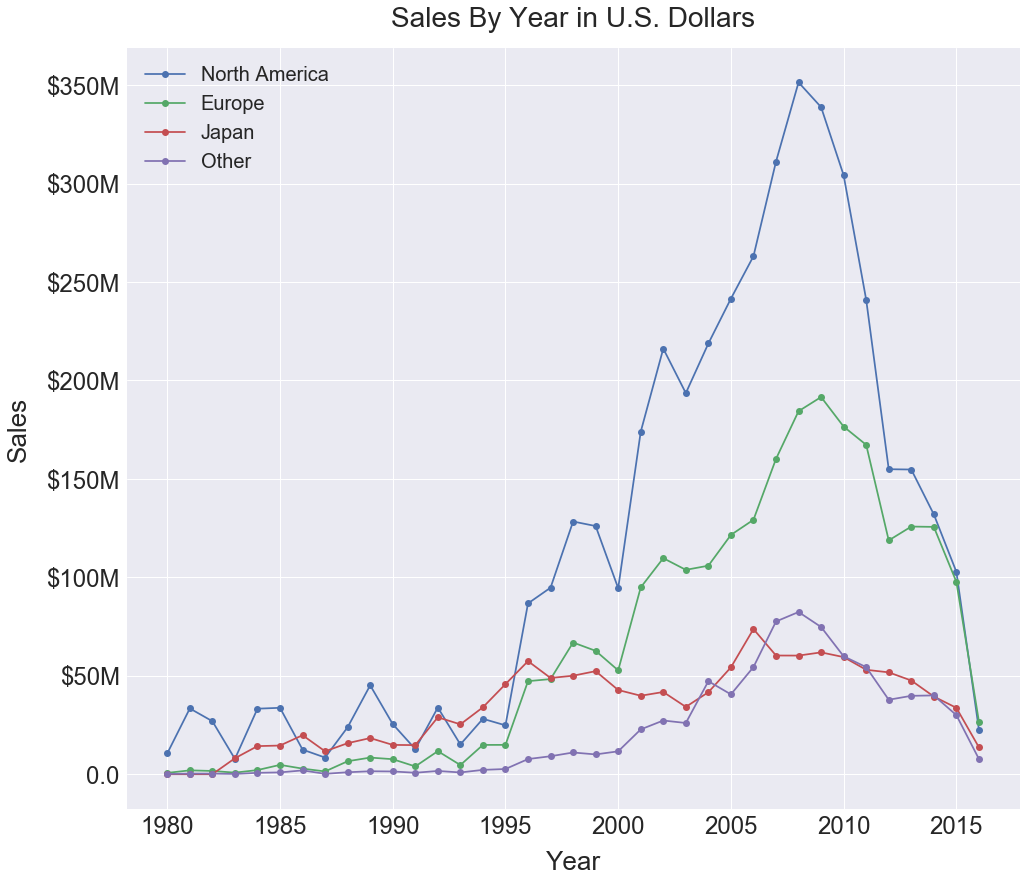

In [25]:
SaleByYear.set_index('Year')[['North America', 'Europe', 'Japan', 'Other']].plot(style='-o', 
                    figsize=(16, 14))
plt.title("Sales By Year in U.S. Dollars", fontsize=28, y=1.02)
plt.yticks(fontsize = 24 )
plt.xticks(fontsize = 24 )
plt.xlabel("Year", fontsize=26, labelpad=12)
plt.ylabel("Sales", fontsize=26, labelpad=15)
plt.legend(fontsize=20)
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))
plt.show();

#### Insights:
1. We can see that sales have been continually increasing. There was a peak in 2008, which was around the start of the recession, which affected the video game industry as severely as many other industries.
2.  North America has been the leader in video game sales for the most part,however, Japan looks like it was able to surpass North America briefly between 1992 and 1996.

### Question 7: For consoles like Wii, Playstation and Xbox, what were the global sales over the past 10 years?

In [26]:
before2011=df[(df["Year"]>=2005) & (df["Year"]<2011)].groupby("ProductFamily")['Global_Sales'].sum().sort_values(ascending = False).reset_index()

In [27]:
after2011=df[(df["Year"]>=2011) & (df["Year"]<2017)].groupby("ProductFamily")['Global_Sales'].sum().sort_values(ascending = False).reset_index()

In [28]:
combined=pd.merge(before2011, after2011, on="ProductFamily")
combined=combined.rename(index=str, columns={"Global_Sales_x": "2005-2010 Sales", "Global_Sales_y": "2011-2016 Sales"})

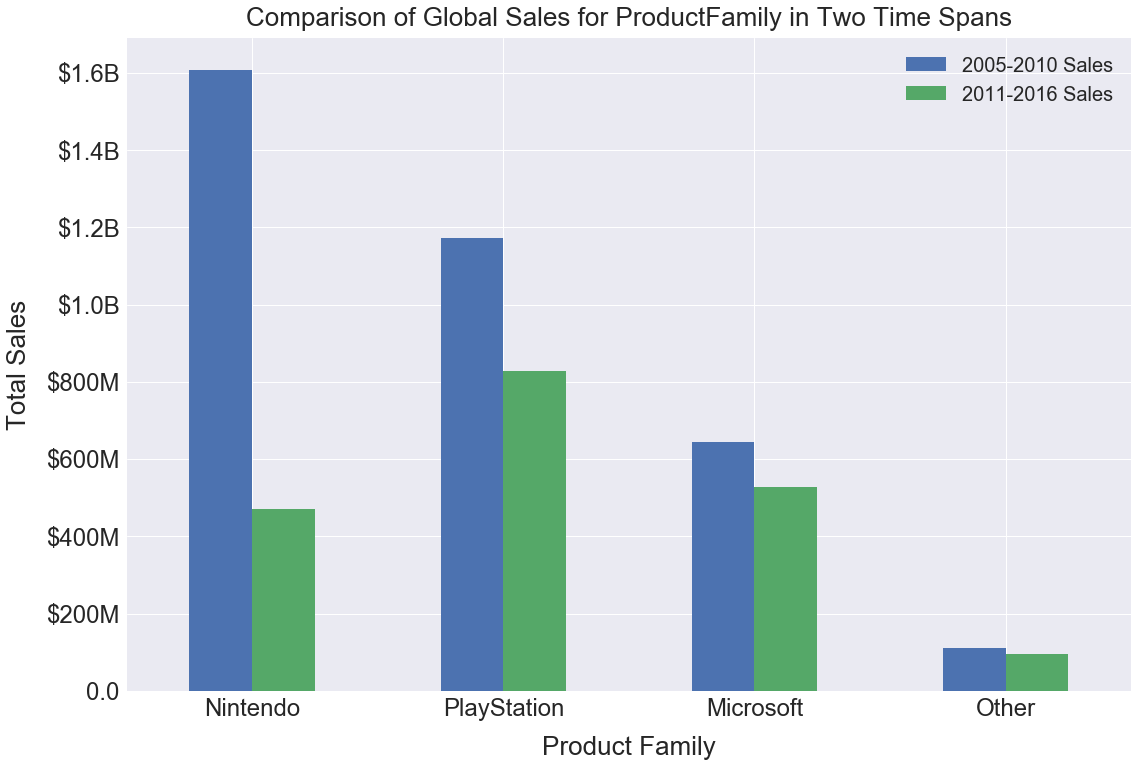

In [29]:
sns.set_style("darkgrid")
combined.set_index('ProductFamily')[['2005-2010 Sales', '2011-2016 Sales']].plot(kind='bar', 
                                                                        figsize=(18, 12))
plt.xticks(rotation=0)
plt.title("Comparison of Global Sales for ProductFamily in Two Time Spans", fontsize=26, y=1.01)
plt.xlabel("Product Family", fontsize=26, labelpad=15)
plt.ylabel("Total Sales", fontsize=26, labelpad=15)
plt.yticks(fontsize = 24 )
plt.xticks(fontsize = 24 )
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))
plt.legend(fontsize=20);

#### Insights:
    1. Nintendo DS had made huge success in sales during the 2005 to 2010 time span.
    2. Playstation overtook the top selling spot during the 2011-2016.
    3. The sales in Nintendo dramatically decrease during the 2011-2016 time span.

### Question 8: For the 10 highest selling games by global sales, how did sales look in each of those 4 specified regions？

In [30]:
df1=df.rename(index=str, columns={"NA_Sales": "North America", "EU_Sales": "Europe",
                                  "JP_Sales": "Japan","Other_Sales": "Other"})
df1=df1.loc[:, 'Name': 'Global_Sales'].sort_values(by="Global_Sales", ascending=True).tail(10)

In [31]:
df1

,Name,Platform,Year,Genre,Publisher,North America,Europe,Japan,Other,Global_Sales
9,Duck Hunt,Nintendo Entertainment System,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
6,New Super Mario Bros.,Nintendo DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
5,Tetris,Game Boy,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
4,Pokemon Red/Pokemon Blue,Game Boy,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
1,Super Mario Bros.,Nintendo Entertainment System,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


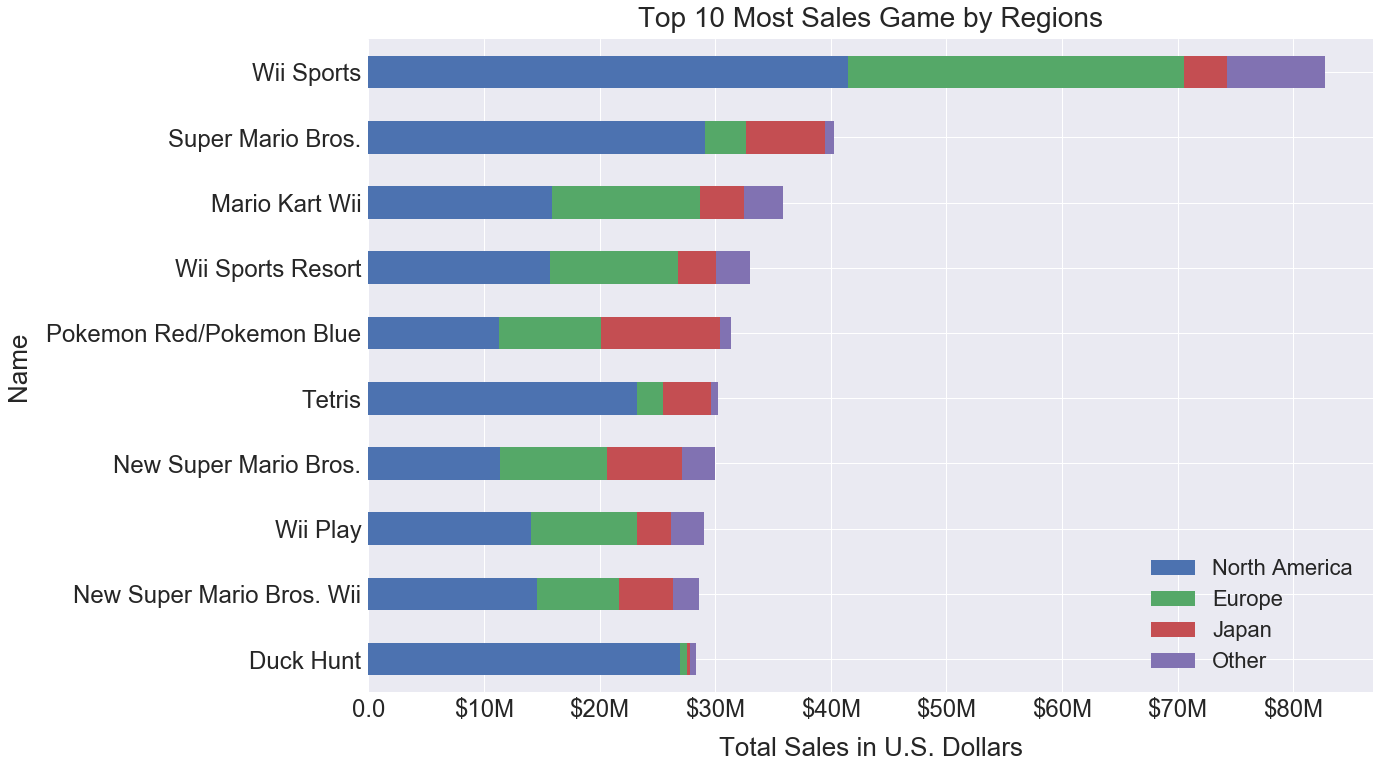

In [32]:
sns.set_style("darkgrid")
ax=df1.set_index('Name')[['North America', 'Europe', 'Japan', 'Other']].plot(kind='barh',
figsize=(18, 12), stacked=True)
plt.title("Top 10 Most Sales Game by Regions", fontsize=28, y=1.01)
plt.xlabel("Total Sales in U.S. Dollars", fontsize=26, labelpad=15)
plt.ylabel("Name", fontsize=26, labelpad=15)
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(x_fmt))
plt.legend(fontsize=22);

#### Insights:
    1.Wii Sports, Super Mario Bros, Duck Hunt and Tetris has the highest North America Sales
    2. According to vgchartz.com,The bundling of Wii Sports with the Wii console is integral to the success of the  Wii console(http://www.vgchartz.com/article/2724/wii-sports-is-the-most-successful-videogame-of-all-time/)